# [Homework 01](https://github.com/DataTalksClub/mlops-zoomcamp/blob/main/01-intro/homework.md)

## Model for predicting the duration of a ride

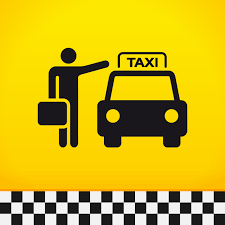

**Read the data for January. How many records are there?**

In [126]:
import pandas as pd

In [127]:
df_jan = pd.read_parquet('../data/fhv_tripdata_2021-01.parquet')

In [128]:
df_jan.shape[0]

1154112

**What's the average trip duration in January?**

In [129]:
(df_jan.dropOff_datetime - df_jan.pickup_datetime).dt.total_seconds().mean()/60

19.167224093791013

**Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive). How many records did you drop?**

In [130]:
df_jan['ride_minutes'] = (df_jan.dropOff_datetime - df_jan.pickup_datetime).dt.total_seconds()/60

In [131]:
mask_outliers = (df_jan['ride_minutes'] >= 1) & (df_jan['ride_minutes'] <= 60)

In [132]:
df_jan = df_jan[mask_outliers] 

In [133]:
sum(~mask_outliers)

44286

**What's the fractions of missing values for the pickup location ID? I.e. fraction of "-1"s after you filled the NAs.**

In [134]:
df_jan[['PUlocationID', 'DOlocationID']] = df_jan[['PUlocationID', 'DOlocationID']].fillna(-1)

In [135]:
sum(df_jan.PUlocationID == -1)/df_jan.PUlocationID.shape[0]

0.8352732770722617

**One-hot encoding. What's the dimensionality of this matrix? (The number of columns).**

In [137]:
from sklearn.feature_extraction import DictVectorizer
df_train = df_jan.copy(deep=True)
df_train[['PUlocationID', 'DOlocationID']] = df_train[['PUlocationID', 'DOlocationID']].astype(str)
dv = DictVectorizer()
X_train = dv.fit_transform(df_train[['PUlocationID', 'DOlocationID']].to_dict(orient='records'))
y_train = df_train['ride_minutes']

In [138]:
X_train.shape[1]

525

**Now let's use the feature matrix from the previous step to train a model.
Train a plain linear regression model with default parameters
Calculate the RMSE of the model on the training data
What's the RMSE on train?**

In [139]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

**Evaluating the model: RMSE using training set**

In [140]:
from sklearn.metrics import mean_squared_error

mean_squared_error(LR.predict(X_train), y_train, squared=False)

10.5285194284187

**Evaluating the model: RMSE using validation set**

In [143]:
df_feb =pd.read_parquet('../data/fhv_tripdata_2021-02.parquet')

In [144]:
df_feb['ride_minutes'] = (df_feb.dropOff_datetime - df_feb.pickup_datetime).dt.total_seconds()/60

In [145]:
mask_outliers = (df_feb['ride_minutes'] >= 1) & (df_feb['ride_minutes'] <= 60)

In [146]:
df_feb = df_feb[mask_outliers]

In [147]:
df_feb[['PUlocationID', 'DOlocationID']] = df_feb[['PUlocationID', 'DOlocationID']].fillna(-1)

In [148]:
df_val = df_feb[['PUlocationID', 'DOlocationID', 'ride_minutes']].dropna()
df_val[['PUlocationID', 'DOlocationID']] = df_val[['PUlocationID', 'DOlocationID']].astype(str)
X_val = dv.transform(df_val[['PUlocationID', 'DOlocationID']].to_dict(orient='records'))
y_val = df_val['ride_minutes']

In [149]:
mean_squared_error(LR.predict(X_val), y_val, squared=False)

11.014285518755779